Extra Trees is an ensemble machine learning algorithm that combines the predictions from many decision trees.

It is related to the widely used random forest algorithm. It can often achieve as-good or better performance than the random forest algorithm, although it uses a simpler algorithm to construct the decision trees used as members of the ensemble.

It is also easy to use given that it has few key hyperparameters and sensible heuristics for configuring these hyperparameters.

#### Extra Trees Algorithm
#### Extremely Randomized Trees, or Extra Trees 
for short, is an ensemble machine learning algorithm.

Specifically, it is an ensemble of decision trees and is related to other ensembles of decision trees algorithms such as bootstrap aggregation (bagging) and random forest.

The Extra Trees algorithm works by creating a large number of unpruned decision trees from the training dataset. Predictions are made by averaging the prediction of the decision trees in the case of regression or using majority voting in the case of classification.

Regression: Predictions made by averaging predictions from decision trees.

Classification: Predictions made by majority voting from decision trees.

Unlike bagging and random forest that develop each decision tree from a bootstrap sample of the training dataset, the Extra Trees algorithm fits each decision tree on the whole training dataset.

Like random forest, the Extra Trees algorithm will randomly sample the features at each split point of a decision tree. Unlike random forest, which uses a greedy algorithm to select an optimal split point, the Extra Trees algorithm selects a split point at random.

In [1]:
# evaluate extra trees algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
# define the model
model = ExtraTreesClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.903 (0.025)


In [2]:
# make predictions using extra trees for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
# define the model
model = ExtraTreesClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-3.52169364,4.00560592,2.94756812,-0.09755101,-0.98835896,1.81021933,-0.32657994,1.08451928,4.98150546,-2.53855736,3.43500614,1.64660497,-4.1557091,-1.55301045,-0.30690987,-1.47665577,6.818756,0.5132918,4.3598337,-4.31785495]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


In [3]:
# evaluate extra trees ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3)
# define the model
model = ExtraTreesRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -69.582 (5.438)


#### Extra Trees Hyperparameters
In this section, we will take a closer look at some of the hyperparameters you should consider tuning for the Extra Trees ensemble and their effect on model performance.

#### Explore Number of Trees
An important hyperparameter for Extra Trees algorithm is the number of decision trees used in the ensemble.

Typically, the number of trees is increased until the model performance stabilizes. Intuition might suggest that more trees will lead to overfitting, although this is not the case. Bagging, Random Forest, and Extra Trees algorithms appear to be somewhat immune to overfitting the training dataset given the stochastic nature of the learning algorithm.

The number of trees can be set via the “n_estimators” argument and defaults to 100.

The example below explores the effect of the number of trees with values between 10 to 5,000.



>10 0.847 (0.031)
>50 0.902 (0.024)
>100 0.910 (0.027)
>500 0.907 (0.026)
>1000 0.909 (0.022)
>5000 0.913 (0.026)


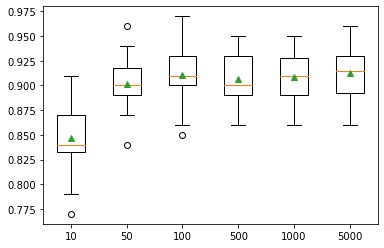

In [6]:
# explore extra trees number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = ExtraTreesClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Explore Number of Features
The number of features that is randomly sampled for each split point is perhaps the most important feature to configure for Extra Trees, as it is for Random Forest.

Like Random Forest, the Extra Trees algorithm is not sensitive to the specific value used, although it is an important hyperparameter to tune.

It is set via the max_features argument and defaults to the square root of the number of input features. In this case for our test dataset, this would be sqrt(20) or about four features.

The example below explores the effect of the number of features randomly selected at each split point on model accuracy. We will try values from 1 to 20 and would expect a small value around four to perform well based on the heuristic.

>1 0.890 (0.028)
>2 0.904 (0.029)
>3 0.906 (0.032)
>4 0.910 (0.027)
>5 0.913 (0.027)
>6 0.907 (0.025)
>7 0.907 (0.027)
>8 0.910 (0.023)
>9 0.907 (0.030)
>10 0.910 (0.027)
>11 0.908 (0.023)
>12 0.906 (0.024)
>13 0.904 (0.027)
>14 0.909 (0.025)
>15 0.906 (0.029)
>16 0.909 (0.026)
>17 0.907 (0.027)
>18 0.909 (0.024)
>19 0.905 (0.025)
>20 0.903 (0.026)


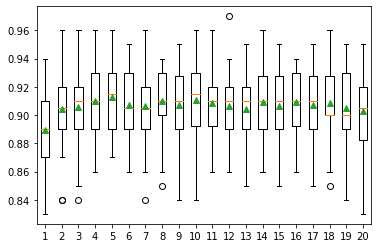

In [8]:
# explore extra trees number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 20
	for i in range(1, 21):
		models[str(i)] = ExtraTreesClassifier(max_features=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Explore Minimum Samples per Split
A final interesting hyperparameter is the number of samples in a node of the decision tree before adding a split.
New splits are only added to a decision tree if the number of samples is equal to or exceeds this value. It is set via the “min_samples_split” argument and defaults to two samples (the lowest value). Smaller numbers of samples result in more splits and a deeper, more specialized tree. In turn, this can mean lower correlation between the predictions made by trees in the ensemble and potentially lift performance.
The example below explores the effect of Extra Trees minimum samples before splitting on model performance, test values between two and 14.

>2 0.907 (0.028)
>3 0.904 (0.022)
>4 0.910 (0.029)
>5 0.907 (0.029)
>6 0.899 (0.026)
>7 0.898 (0.030)
>8 0.898 (0.029)
>9 0.900 (0.025)
>10 0.892 (0.029)
>11 0.890 (0.028)
>12 0.890 (0.027)
>13 0.895 (0.022)
>14 0.888 (0.027)


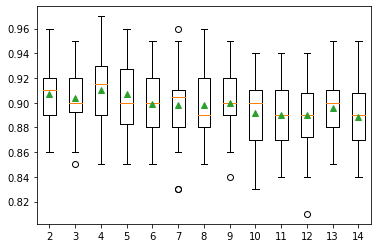

In [7]:
# explore extra trees minimum number of samples for a split effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore the number of samples per split from 2 to 14
	for i in range(2, 15):
		models[str(i)] = ExtraTreesClassifier(min_samples_split=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.889 (0.027)
>2 0.900 (0.024)
>3 0.902 (0.027)
>4 0.907 (0.023)
>5 0.908 (0.027)
>6 0.904 (0.024)
>7 0.910 (0.026)
>8 0.912 (0.026)
>9 0.908 (0.027)
>10 0.909 (0.025)
>11 0.906 (0.025)
>12 0.908 (0.022)
>13 0.911 (0.023)
>14 0.910 (0.028)
>15 0.906 (0.023)
>16 0.907 (0.023)
>17 0.907 (0.022)
>18 0.905 (0.027)
>19 0.908 (0.024)
>20 0.905 (0.027)


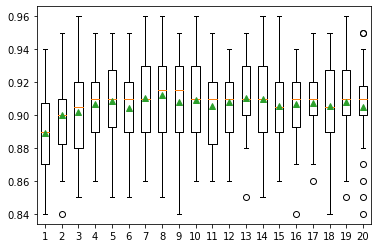